# Exploratory Data Analysis

In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


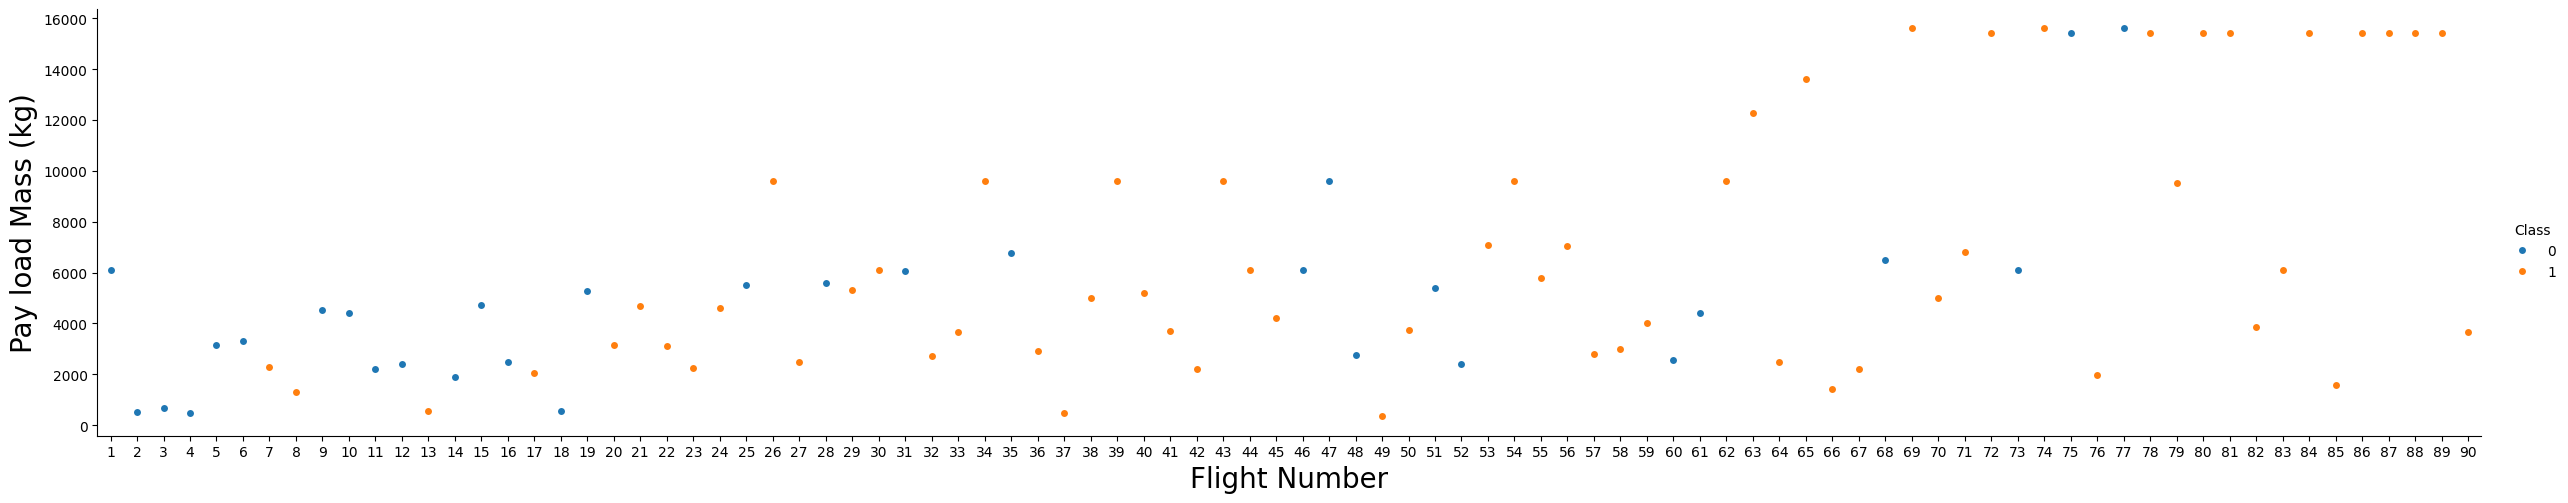

In [3]:
sns.catplot(y = "PayloadMass", x = "FlightNumber", hue = "Class", data = df, aspect = 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Pay load Mass (kg)", fontsize = 20)
plt.show()

# Visualize the relationship between Flight Number and Launch Site

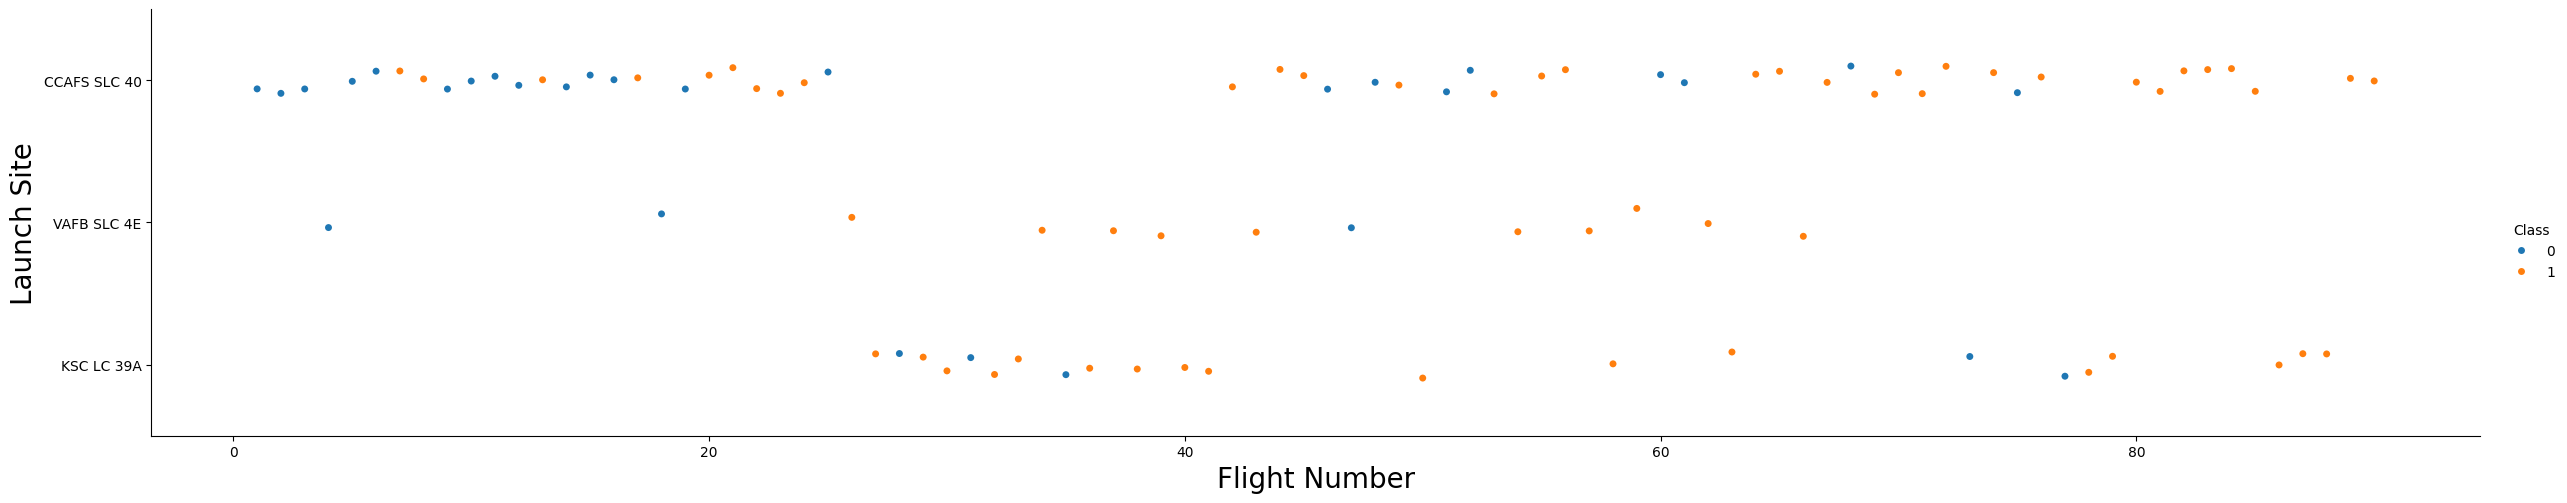

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(data = df, x = "FlightNumber", y = "LaunchSite", hue = "Class", aspect = 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
plt.show()

# Visualize the relationship between Payload and Launch Site

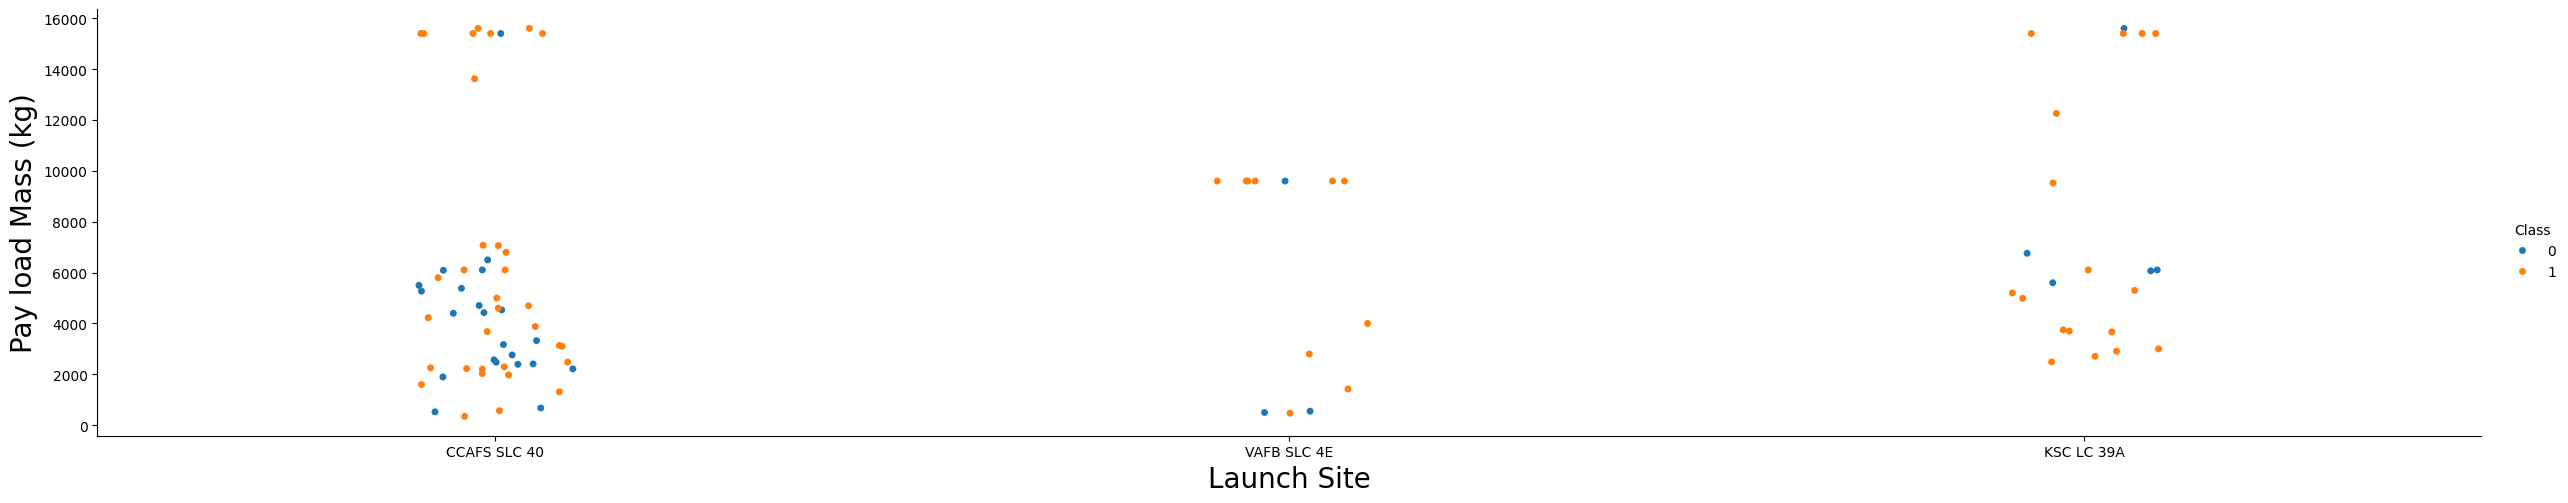

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(data = df, x = "LaunchSite", y = "PayloadMass", hue = "Class", aspect = 5)
plt.xlabel("Launch Site", fontsize = 20)
plt.ylabel("Pay load Mass (kg)", fontsize = 20)
plt.show()

# Visualize the relationship between success rate of each orbit type

<Axes: xlabel='Orbit', ylabel='Class'>

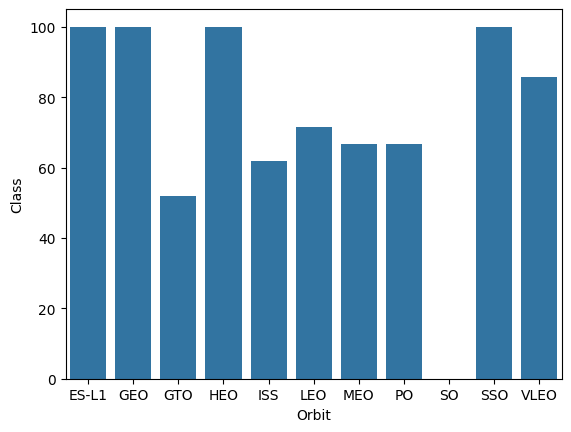

In [9]:
import seaborn as sns

# Group by 'Orbit' and calculate the mean of the 'Class' column
orbit_mean = df.groupby('Orbit')['Class'].mean().reset_index()

# Multiply the mean of 'Class' by 100
orbit_mean['Class'] = orbit_mean['Class'] * 100

# Create a bar plot using seaborn
sns.barplot(x='Orbit', y='Class', data=orbit_mean)


# Visualize the relationship between FlightNumber and Orbit type

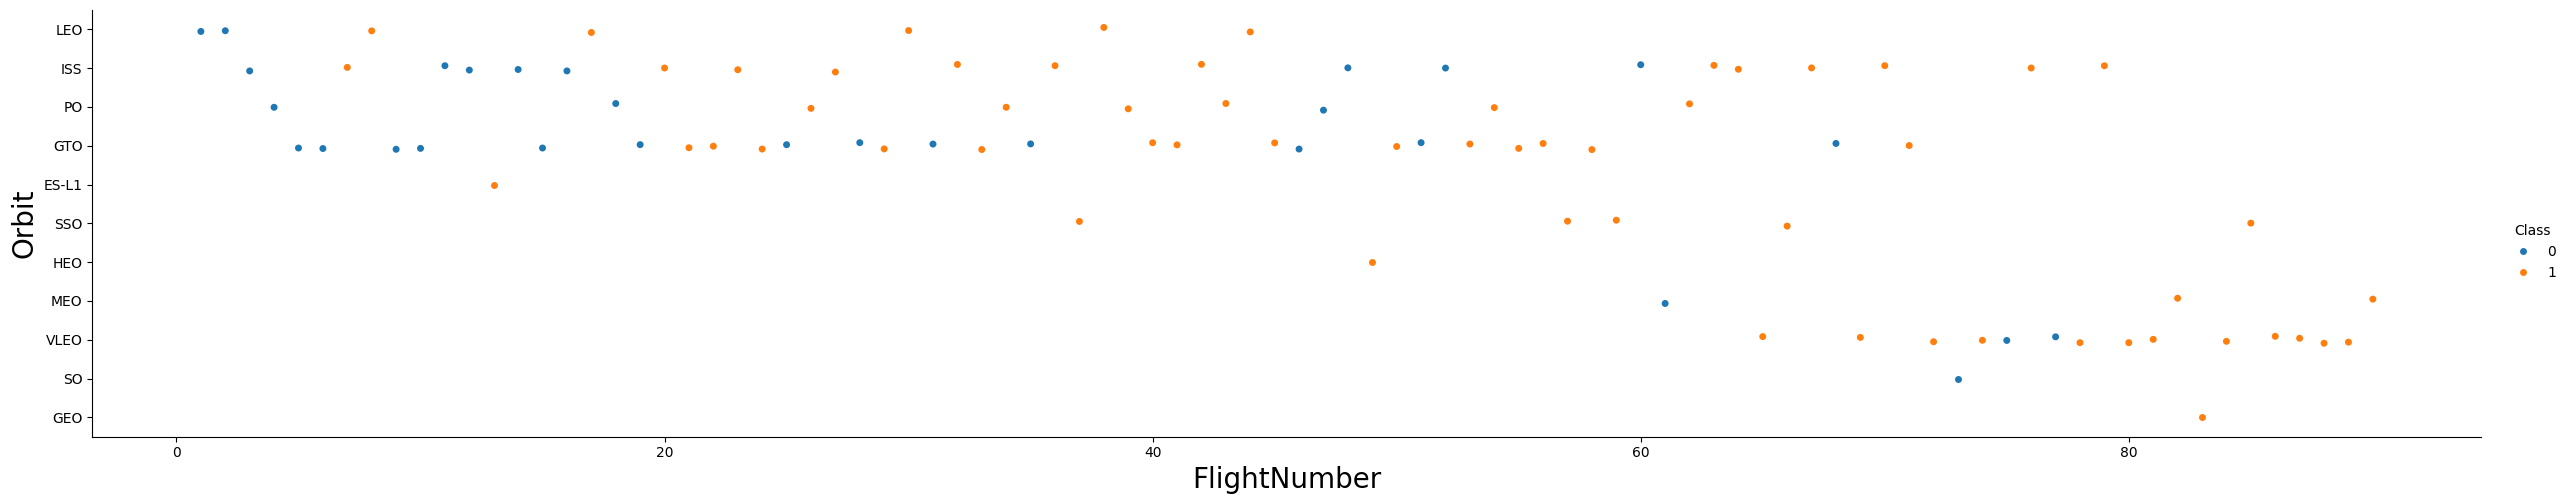

In [10]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(data = df, x = "FlightNumber", y = "Orbit", hue = "Class", aspect = 5)
plt.xlabel("FlightNumber", fontsize = 20)
plt.ylabel("Orbit", fontsize = 20)
plt.show()

# Visualize the relationship between Payload and Orbit type

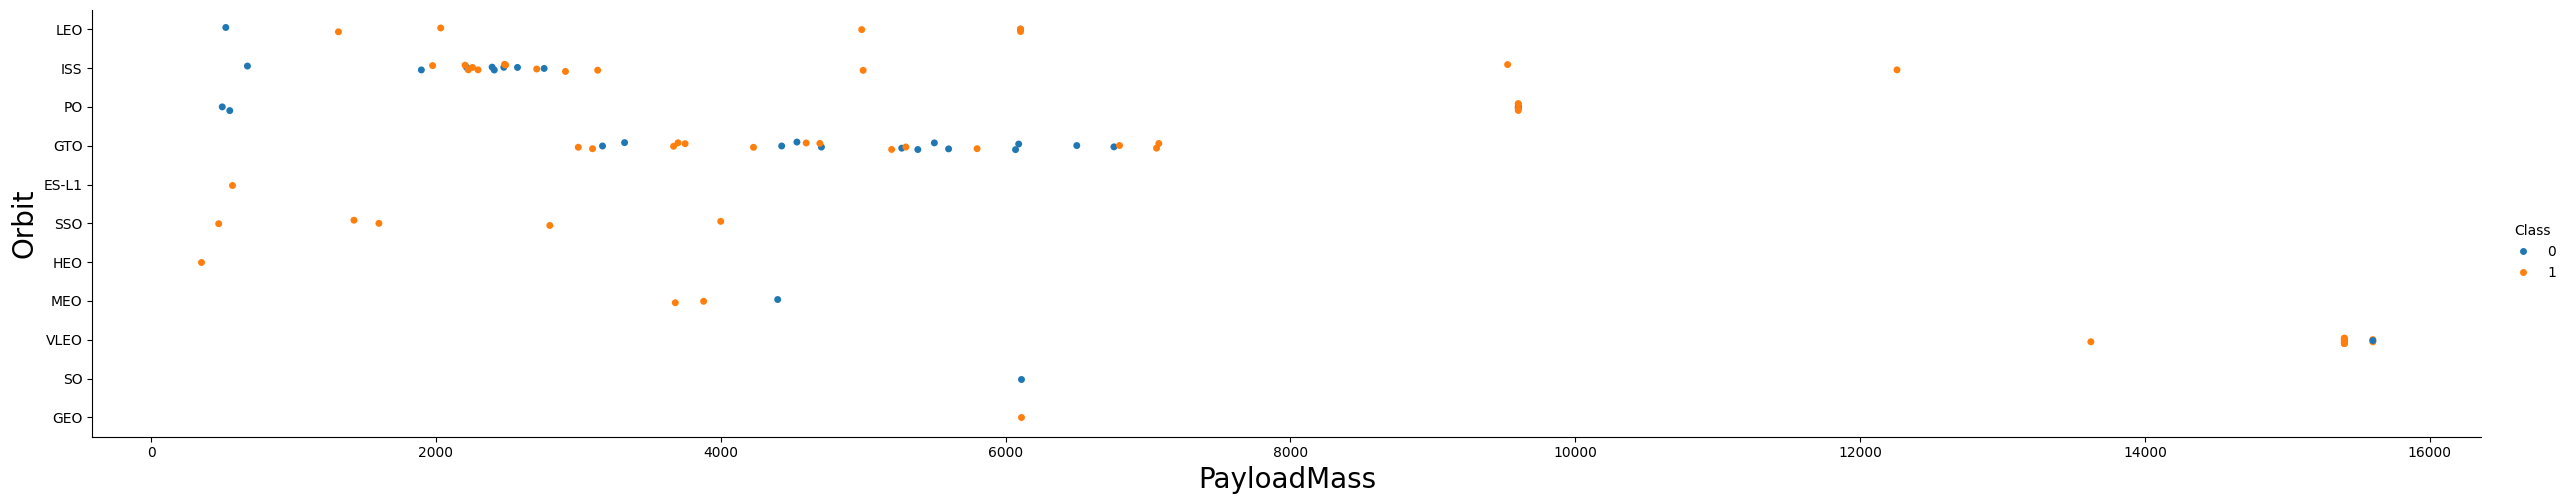

In [11]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(data = df, x = "PayloadMass", y = "Orbit", hue = "Class", aspect = 5)
plt.xlabel("PayloadMass", fontsize = 20)
plt.ylabel("Orbit", fontsize = 20)
plt.show()

# Visualize the launch success yearly trend

In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

<Axes: xlabel='year', ylabel='Success Rate'>

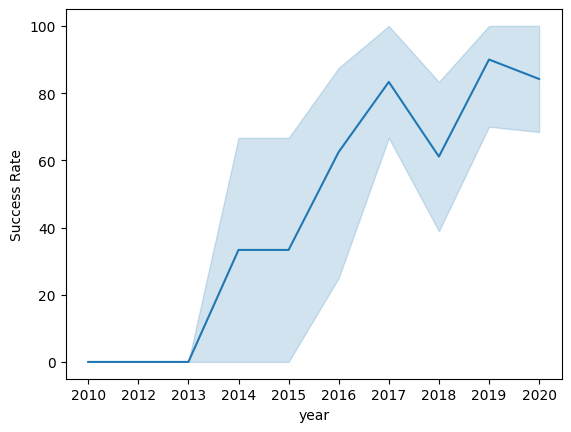

In [13]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year = []
df["year"] = Extract_year(year)
df["Success Rate"] = df["Class"] * 100
sns.lineplot(data = df, x = "year", y = "Success Rate")

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


# Create dummy variables to categorical columns

In [15]:
# HINT: Use get_dummies() function on the categorical columns
orbit_ohe = pd.get_dummies(features["Orbit"])
launch_ohe = pd.get_dummies(features["LaunchSite"])
landing_ohe = pd.get_dummies(features["LandingPad"])
serial_ohe = pd.get_dummies(features["Serial"])
remainder = features[["FlightNumber","PayloadMass", "Flights", "GridFins", "Reused", "Legs", "Block","ReusedCount"]]
features_one_hot = pd.concat([orbit_ohe, launch_ohe, landing_ohe, serial_ohe, remainder], axis = 1)
features_one_hot.head()

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,...,B1060,B1062,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount
0,False,False,False,False,False,True,False,False,False,False,...,False,False,1,6104.959412,1,False,False,False,1.0,0
1,False,False,False,False,False,True,False,False,False,False,...,False,False,2,525.000000,1,False,False,False,1.0,0
2,False,False,False,False,True,False,False,False,False,False,...,False,False,3,677.000000,1,False,False,False,1.0,0
3,False,False,False,False,False,False,False,True,False,False,...,False,False,4,500.000000,1,False,False,False,1.0,0
4,False,False,True,False,False,False,False,False,False,False,...,False,False,5,3170.000000,1,False,False,False,1.0,0


# Cast all numeric columns to float64

In [16]:
# HINT: use astype function
features_one_hot.astype('float64')

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,...,B1060,B1062,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0
